In [1]:
import gymnasium as gym
import os
# You can choose to use gym library instead of gymnasium
# import gym 

import warnings
from collections import namedtuple
warnings.filterwarnings("ignore", category=DeprecationWarning)
partition = namedtuple("partition", ["type", "subtype"])

In [2]:
gym.__version__

'0.29.1'

In [3]:
e = gym.make("MountainCar-v0")

In [4]:
obs = e.reset()

In [5]:
obs

(array([-0.54759073,  0.        ], dtype=float32), {})

In [6]:
e.action_space

Discrete(3)

Our action space is 4, this means we have 4 potential actions to take

0. Accelerate left
1. Don't accelerate
2. Accelerate right


In [7]:
from gym.spaces.discrete import Discrete

In [8]:
d = Discrete(3) 

In [9]:
[d.sample() for x in range(10)]

[0, 1, 1, 0, 0, 1, 1, 2, 0, 0]

In [10]:
print(d.contains(0), d.contains(2))

True True


In [11]:
e.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [12]:
e.step(1)

(array([-5.4741096e-01,  1.7978430e-04], dtype=float32),
 -1.0,
 False,
 False,
 {})

In [13]:
e.step(0) 

(array([-0.5480527 , -0.00064178], dtype=float32), -1.0, False, False, {})

In [14]:
env = gym.make("MountainCar-v0")

total_reward = 0.0
total_steps = 0
obs = env.reset()

while True:
    action = env.action_space.sample()  # Random action: 0=up, 1=right, 2=down, 3=left
    obs, reward, terminated, truncated, info = env.step(action)  # Properly unpack all five values
    total_reward += reward
    total_steps += 1
    # Check if the episode has ended either by termination or truncation
    if terminated or truncated:
        break
print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))

Episode done in 200 steps, total reward -200.00


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import numpy as np

In [16]:
def show_state(img, step):
    plt.figure(3)
    plt.clf()
    plt.imshow(img)
    plt.title(f"Step: {step}")
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

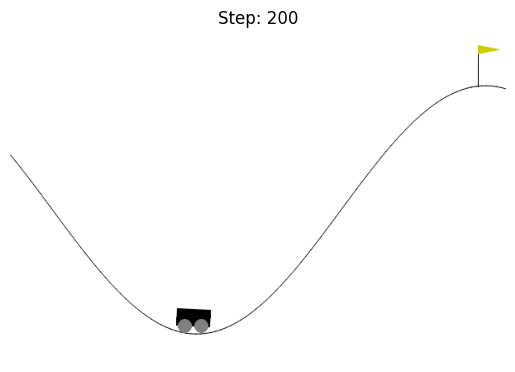

Episode done in 200 steps, total reward -200.00


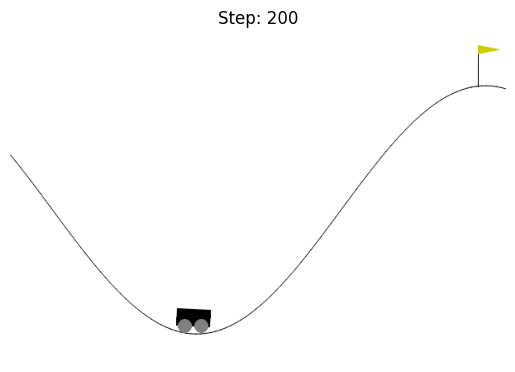

In [17]:
# Properly initialize the environment with rgb_array rendering mode
env = gym.make('MountainCar-v0', render_mode='rgb_array')

total_reward = 0.0
total_steps = 0
obs = env.reset()  

while True:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)  
    total_reward += reward
    total_steps += 1

    # Get the RGB array of the environment's current state and display it
    img = env.render()  
    show_state(img, total_steps)  # Use the function to display the state

    if terminated or truncated:
            break

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))
env.close() 

In [18]:
import random
class RandomEpsilonWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomEpsilonWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action):
        if random.random() < self.epsilon:
            print("Random!")
            return self.env.action_space.sample()
        else:
            print("Policy")
        return action

In [19]:
env = RandomEpsilonWrapper(gym.make("CartPole-v1"),epsilon=0.5)

obs = env.reset()
total_reward = 0.0

while True:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action) 
    total_reward += reward
    total_steps += 1

   
    img = env.render()  

    if terminated or truncated:
            break
print("Reward got: %.2f" % total_reward)

Policy
Policy
Random!
Policy
Random!
Policy
Random!
Random!
Random!
Random!
Random!
Policy
Reward got: 12.00


c:\Users\404er\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\classic_control\cartpole.py:215: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Let's implement a reflex agent.

In [30]:


def reflex_agent(state):
    position, velocity = state
    # Simple reflex condition: accelerate in the direction of current velocity
    if velocity > 0:
        return 2  # Accelerate to the right
    elif velocity < 0:
        return 0  # Accelerate to the left
    else:
        
        return 2 

class ReflexAgent:
    def __init__(self, env_name="MountainCar-v0"):
        self.env = gym.make(env_name)
        self.rewards = []
        self.steps = []
        self.policies = []  # Store the action sequences for each episode

    def play_episode(self):
        total_reward = 0.0
        state, _ = self.env.reset()  # Reset returns state and info
        steps = 0
        actions = []
        while True:
            action = reflex_agent(state)  # Use the reflex agent function
            state, reward, done, truncated, _ = self.env.step(action)
            total_reward += reward
            steps += 1
            actions.append(action)
            if done or truncated:
                break
        return total_reward, steps, actions
    
    def repeat(self, n_samples):
        for _ in range(n_samples):
            reward, step, actions = self.play_episode()
            self.rewards.append(reward)
            self.steps.append(step)
            self.policies.append(actions)  # Store each episode's actions

-119.4185 3.6790430481308585 -113.0


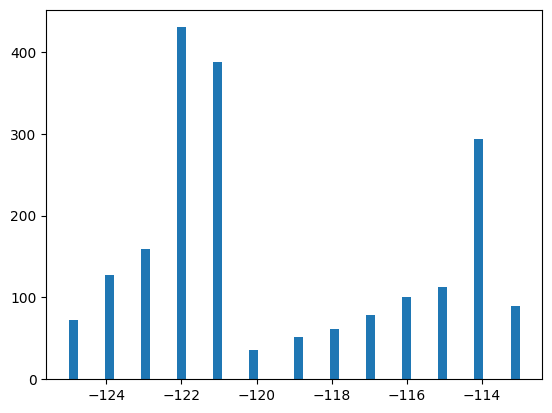

In [36]:
ra = ReflexAgent()
ra.repeat(2000)
rewards = ra.rewards
plt.hist(rewards,bins=50)
print(np.mean(rewards), np.std(rewards), max(rewards))

Now a random agent.

In [37]:
class RandomAgent:
    def __init__(self, env_name="MountainCar-v0"):
        self.env = gym.make(env_name)
        self.rewards = []  # To store the total rewards of each episode
        self.steps = []    # To store the number of steps in each episode
        self.policies = [] # To store the sequence of actions (policy) for each episode

    def play_episode(self):
        total_reward = 0.0
        state, _ = self.env.reset()  # Reset returns state and info
        steps = 0
        actions = []
        while True:
            action = self.env.action_space.sample()  # Choose a random action
            state, reward, done, truncated, _ = self.env.step(action)
            total_reward += reward
            steps += 1
            actions.append(action)
            if done or truncated:
                break
        return total_reward, steps, actions
    
    def repeat(self, n_samples):
        for _ in range(n_samples):
            reward, step, actions = self.play_episode()
            self.rewards.append(reward)
            self.steps.append(step)
            self.policies.append(actions)  # Correctly store the sequence of actions


-200.0 0.0 -200.0


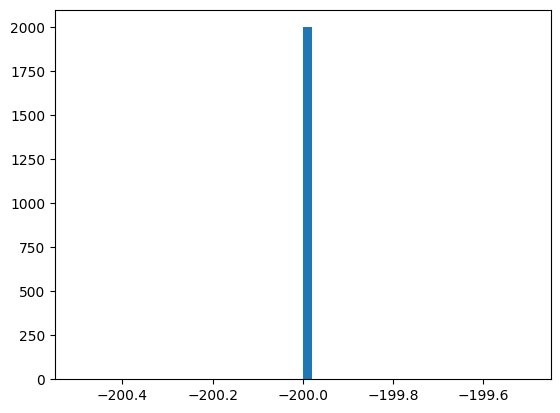

In [38]:
rda= RandomAgent()
rda.repeat(2000)
rewards1 = rda.rewards
plt.hist(rewards1,bins=50)
print(np.mean(rewards1), np.std(rewards1), max(rewards1))

In [39]:
from datetime import datetime
def replay(policy, video_folder='C:/Users/404er/Videos/mountaincar'):
    # Generate a unique directory name based on the current datetime
    timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    video_folder = os.path.join(video_folder, timestamp)
    os.makedirs(video_folder, exist_ok=True)  # Ensure the video folder exists

    # Setup the environment with video recording
    env = gym.make("MountainCar-v0", render_mode='rgb_array')
    env = gym.wrappers.RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: True)

    state, _ = env.reset()
    step = 0
    total_reward = 0
    done = False

    try:
        for a in policy:
            obs, reward, done, truncated, _ = env.step(a)
            total_reward += reward
            img = env.render()
            show_state(img, step)
            step += 1
            if done or truncated:
                break
    finally:
        env.close()  # Ensure the environment is always closed

    print(f"Final reward for the replayed episode: {total_reward}")

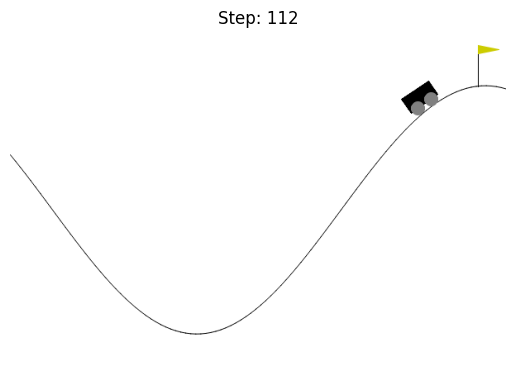

Moviepy - Building video C:\Users\404er\Videos\mountaincar\2024-08-08_14-40-37\rl-video-episode-0.mp4.
Moviepy - Writing video C:\Users\404er\Videos\mountaincar\2024-08-08_14-40-37\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\404er\Videos\mountaincar\2024-08-08_14-40-37\rl-video-episode-0.mp4
Final reward for the replayed episode: -113.0


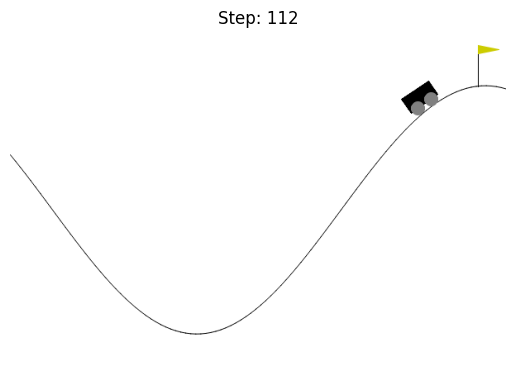

In [41]:
best_reflex_index = np.argmax(ra.rewards)  # Index of the best policy
best_reflex = ra.policies[best_reflex_index]  # Retrieve the best policy
replay(best_reflex)


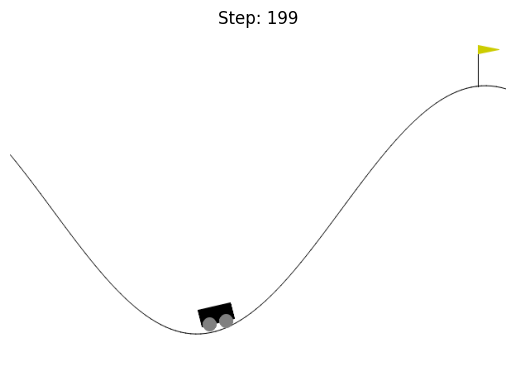

Final reward for the replayed episode: -200.0


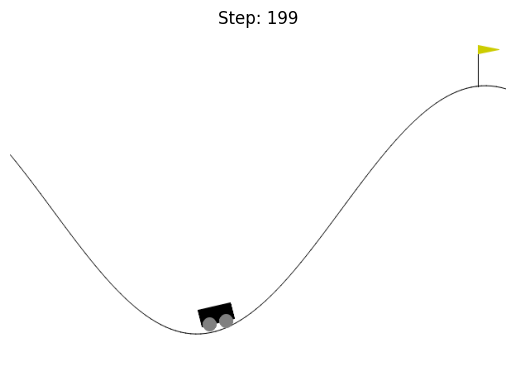

In [42]:
best_random = rda.policies[np.argmax(rewards1)]
replay(best_random) 

Now Implementing a Qlearning agent

In [27]:
class QLearningAgent:
    def __init__(self, env_name="MountainCar-v0", alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.9, epsilon_min=0.01):
        self.env = gym.make(env_name)
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay  # Exploration decay factor
        self.epsilon_min = epsilon_min  # Minimum exploration rate
        
        # Define discretization bins for position and velocity
        self.position_bins = np.linspace(-1.2, 0.6, 40)  # Increase to 40 bins for finer resolution
        self.velocity_bins = np.linspace(-0.07, 0.07, 40)  # Increase to 40 bins for finer resolution

        # Initialize Q-table with dimensions based on discretized states and discrete actions
        self.q_table = np.zeros((len(self.position_bins) + 1, len(self.velocity_bins) + 1, self.env.action_space.n))

    def discretize_state(self, state):
        position, velocity = state
        position_idx = np.digitize(position, self.position_bins)
        velocity_idx = np.digitize(velocity, self.velocity_bins)
        return (position_idx, velocity_idx)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit

    def update_q_table(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + (self.gamma * self.q_table[next_state][best_next_action] * (not done))
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

    def train(self, episodes=2000):
        for episode in range(episodes):
            state, _ = self.env.reset()
            state = self.discretize_state(state)
            total_reward = 0
            steps = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done, _, _ = self.env.step(action)
                
                # Example of reward shaping: additional reward for moving right
                reward = reward + (0.1 * next_state[0])  # Encourages movement to the right

                next_state = self.discretize_state(next_state)
                self.update_q_table(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
                steps += 1

            # Decay epsilon
            self.epsilon = max(self.epsilon_min, self.epsilon_decay * self.epsilon)
            print(f"Episode {episode + 1}/{episodes} finished in {steps} steps with total reward {total_reward}")

    def test_policy(self, max_steps=200):
        state, _ = self.env.reset()
        state = self.discretize_state(state)
        policy = []
        done = False
        steps = 0
        while not done and steps < max_steps:
            action = np.argmax(self.q_table[state])  # Choose the best action from the Q-table
            policy.append(action)
            next_state, _, done, _, _ = self.env.step(action)
            next_state = self.discretize_state(next_state)
            state = next_state
            steps += 1
        return policy

Train the agent


In [28]:
agent = QLearningAgent()
agent.train(episodes=2000)


Episode 1/5000 finished in 8115 steps with total reward -8532.847414086207
Episode 2/5000 finished in 29634 steps with total reward -31136.418478004627
Episode 3/5000 finished in 9722 steps with total reward -10209.502842558473
Episode 4/5000 finished in 19285 steps with total reward -20220.68088958125
Episode 5/5000 finished in 4302 steps with total reward -4525.650867565038
Episode 6/5000 finished in 2254 steps with total reward -2365.02821626884
Episode 7/5000 finished in 3330 steps with total reward -3501.275232050297
Episode 8/5000 finished in 3116 steps with total reward -3263.975845506166
Episode 9/5000 finished in 2900 steps with total reward -3037.9860534157488
Episode 10/5000 finished in 2356 steps with total reward -2467.2212973261667
Episode 11/5000 finished in 1790 steps with total reward -1880.7803103165631
Episode 12/5000 finished in 2331 steps with total reward -2447.853627417938
Episode 13/5000 finished in 1462 steps with total reward -1531.1171948214458
Episode 14/500

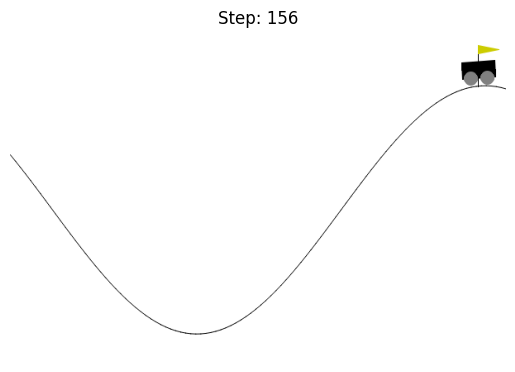

Final reward for the replayed episode: -157.0


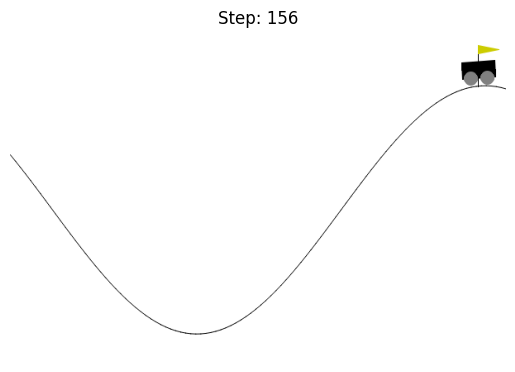

In [29]:
# Generate the best policy using the trained Q-table
best_policy = agent.test_policy()

# Replay the best policy
replay(best_policy)